In [1]:
import pandas as pd
from datetime import datetime, timedelta, date
import numpy as np
from collections import Counter
from data_science_toolkit.data_visualization import get_fig_ax, visualize_class_distribution, top_n_tokens_plot_from_counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [2]:
%matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [3]:
stop_words = set(stopwords.words('english')).union({''})
# , '-', '&', '"', ':', '/'

In [4]:
file_name = 'trump_tweets_sp500.csv'
stock_tweet = pd.read_csv('./stocks/{}'.format(file_name))
stock_tweet['created_at']= pd.to_datetime(stock_tweet['created_at']) 

In [5]:
stock_tweet.head(10)

,text,created_at,retweet_count,favorite_count,is_retweet,after_dir,1_open_dir,1_close_dir,2_open_dir,2_close_dir,eow_close_dir,sow_open_dir,sig_up,sig_down,is_sig,preprocessed_text,created_hour,dow,num_links,num_words
0,Trump Tycoon App for iPhone & iPod Touch - It's $2.99 but the advice is priceless! http://bit.ly/UGUF0,2010-01-15 16:28:02,23.0,20,False,0,0,1,1,0,0,0,0,1,1,trump tycoon app for iphone & ipod touch - it 's $ 2.99 but the advice is priceless ! msciurl,16,4,1,15
1,"from Donald Trump: ""I saw Lady Gaga last night and she was fantastic!""",2010-01-21 16:58:43,3813.0,3223,False,0,0,0,0,0,0,0,0,1,1,from donald trump : `` i saw lady gaga last night and she was fantastic ! '',16,3,0,14
2,From Donald Trump: Andrea Bocelli @ Mar-a-Lago - Many say best night of entertainment in long history of Palm Beach http://bit.ly/2fNgOz,2010-03-05 14:51:32,7.0,6,False,1,1,1,1,1,1,1,1,0,1,from donald trump : andrea bocelli @ mar-a-lago - many say best night of entertainment in long history of palm beach msciurl,14,4,1,18
3,Olympic Gold Medalist Evan Lysacek just left my office. He is in town and wanted to meet me--he's a fanastic guy and a true champion.,2010-03-17 15:14:13,13.0,7,False,1,1,1,1,0,0,0,1,0,1,olympic gold medalist evan lysacek just left my office . he is in town and wanted to meet me -- he 's a fanastic guy and a true champion .,15,2,0,26
4,Last week's episode of the Celebrity Apprentice set the stage for a great new season. Tune in this Sunday on NBC for even more excitement.,2010-03-19 14:08:33,9.0,2,False,0,0,0,0,1,0,0,0,1,1,last week 's episode of the celebrity apprentice set the stage for a great new season . tune in this sunday on nbc for even more excitement .,14,4,0,25
5,The Trump Hotel Collection is currently nominated for Conde Nast Traveler Readers Choice Awards Travel & Leisure and World Travel Awards.,2010-03-23 16:26:23,13.0,5,False,1,1,1,1,0,1,1,1,0,1,the trump hotel collection is currently nominated for conde nast traveler readers choice awards travel & leisure and world travel awards .,16,1,0,20
6,This is a terrific day for downtown New York. Trump SoHo is unlike anything else. Be sure to visit this fantastic hotel soon!,2010-04-09 16:36:36,10.0,5,False,1,1,1,1,1,1,1,1,0,1,this is a terrific day for downtown new york . trump soho is unlike anything else . be sure to visit this fantastic hotel soon !,16,4,0,22
7,On Sunday Jerome Bettis 'the bus' from the Pittsburgh Steelers will play at Trump Int'l Golf Club/Palm Beach against Julius Erving 'Dr J',2010-04-16 15:55:06,8.0,3,False,0,0,0,0,0,0,0,0,1,1,on sunday jerome bettis 'the bus ' from the pittsburgh steelers will play at trump int ' l golf club/palm beach against julius erving 'dr j ',15,4,0,22
8,Melania and I will be appearing on The View tomorrow at 11 a.m. on CBS. Tune in for some great fun!,2010-04-22 14:31:53,19.0,5,False,1,1,1,1,1,1,1,1,0,1,melania and i will be appearing on the view tomorrow at 11 a.m. on cbs . tune in for some great fun !,14,3,0,20
9,To put on your calendar for May: Miss USA 2010 live from Las Vegas on May 16th 7 p.m. ET on NBC. I'll be there--tune in for a great show!,2010-04-23 15:22:08,25.0,3,False,1,1,1,1,0,1,1,1,0,1,to put on your calendar for may : miss usa 2010 live from las vegas on may 16th 7 p.m . et on nbc . i 'll be there -- tune in for a great show !,15,4,0,30


In [6]:
since_election = stock_tweet[stock_tweet["created_at"] > datetime(2016, 11, 8)]

# 1.0 Class Distribution

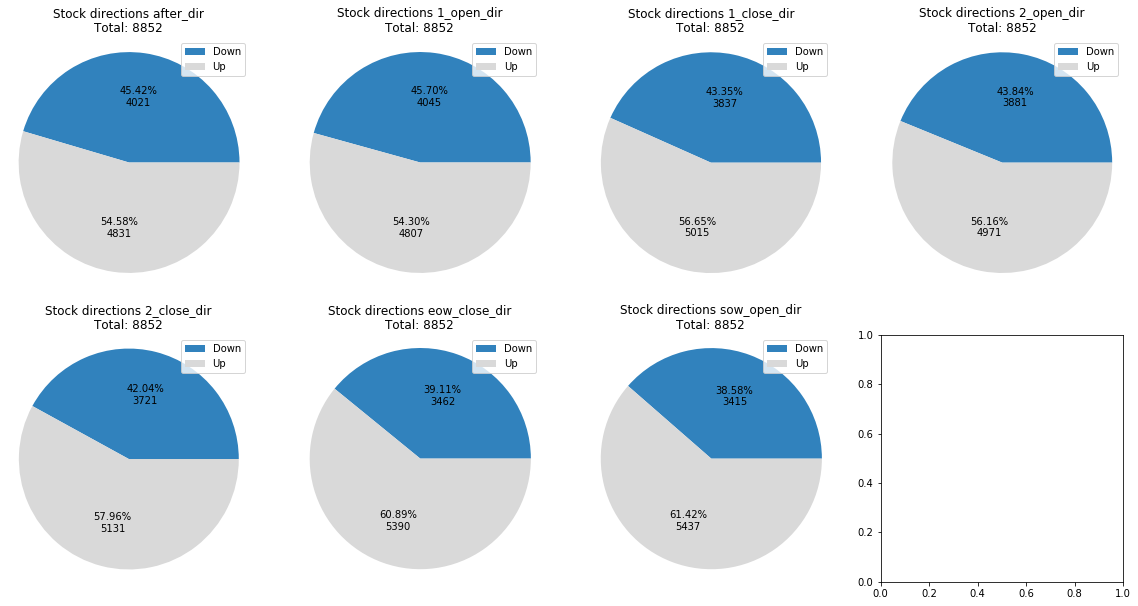

In [7]:
fig, ax = get_fig_ax(2, 4, 5, 5)
ax = visualize_class_distribution(stock_tweet["after_dir"], given_title="Stock directions after_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=0)
ax = visualize_class_distribution(stock_tweet["1_open_dir"], given_title="Stock directions 1_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=1)
ax = visualize_class_distribution(stock_tweet["1_close_dir"], given_title="Stock directions 1_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=2)
ax = visualize_class_distribution(stock_tweet["2_open_dir"], given_title="Stock directions 2_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=3)
ax = visualize_class_distribution(stock_tweet["2_close_dir"], given_title="Stock directions 2_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=0)
ax = visualize_class_distribution(stock_tweet["eow_close_dir"], given_title="Stock directions eow_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=1)
ax = visualize_class_distribution(stock_tweet["sow_open_dir"], given_title="Stock directions sow_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=2)

## 1.1 Class Distribution since Election

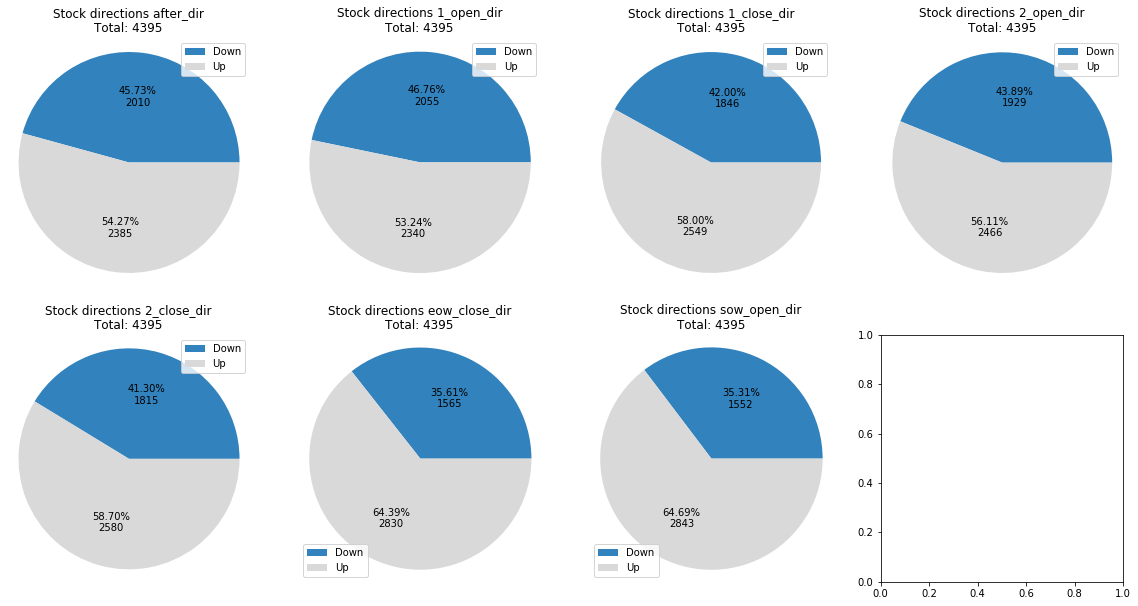

In [8]:
fig, ax = get_fig_ax(2, 4, 5, 5)
ax = visualize_class_distribution(since_election["after_dir"], given_title="Stock directions after_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=0)
ax = visualize_class_distribution(since_election["1_open_dir"], given_title="Stock directions 1_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=1)
ax = visualize_class_distribution(since_election["1_close_dir"], given_title="Stock directions 1_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=2)
ax = visualize_class_distribution(since_election["2_open_dir"], given_title="Stock directions 2_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=3)
ax = visualize_class_distribution(since_election["2_close_dir"], given_title="Stock directions 2_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=0)
ax = visualize_class_distribution(since_election["eow_close_dir"], given_title="Stock directions eow_close_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=1)
ax = visualize_class_distribution(since_election["sow_open_dir"], given_title="Stock directions sow_open_dir", given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=2)

# 2.0 Most Common Words

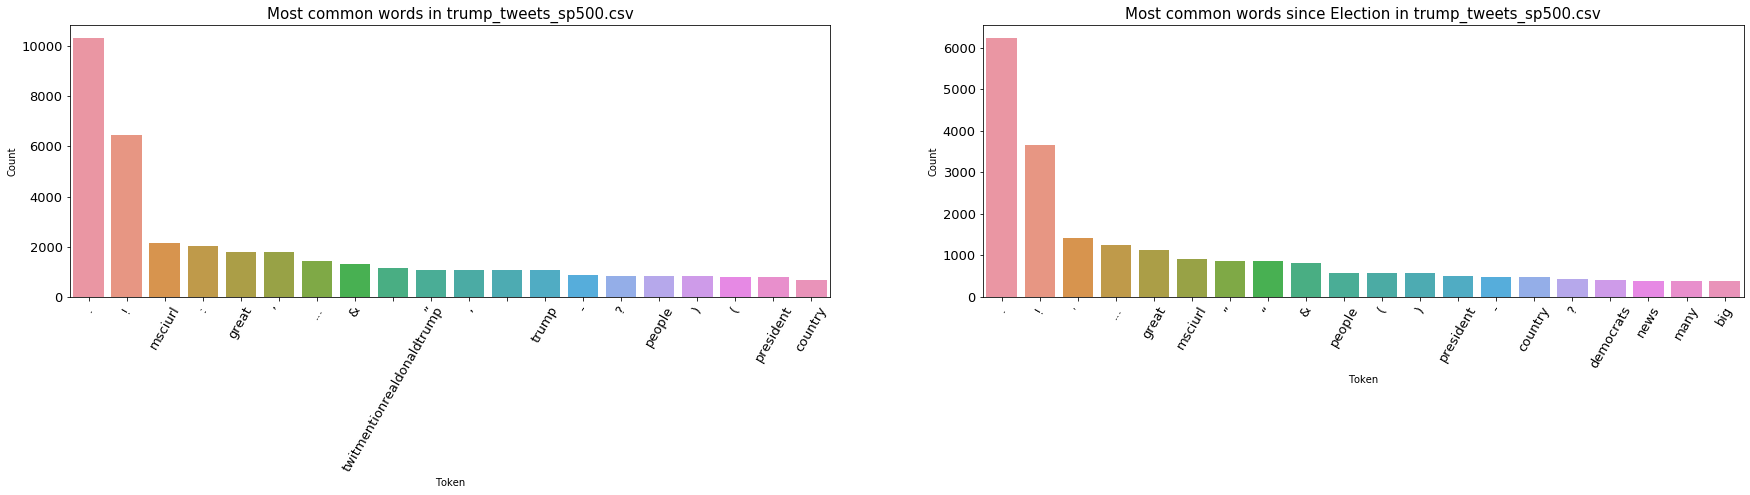

In [9]:
fig, ax = get_fig_ax(1, 2, 15, 5)
ax = top_n_tokens_plot_from_counter(Counter([x for x in ' '.join(stock_tweet["preprocessed_text"].tolist()).split(" ") if x not in stop_words]), 20, ax, 0, 0, "Most common words in {}".format(file_name))
ax = top_n_tokens_plot_from_counter(Counter([x for x in ' '.join(since_election["preprocessed_text"].tolist()).split(" ") if x not in stop_words]), 20, ax, 0, 1, "Most common words since Election in {}".format(file_name))

## 2.1 Most Common Words (Up/Unchanged vs Down)

In [10]:
up_tweet = stock_tweet[stock_tweet['after_dir'] == 1]
up_since_election = since_election[since_election['after_dir'] == 1]
down_tweet = stock_tweet[stock_tweet['after_dir'] == 0]
down_since_election = since_election[since_election['after_dir'] == 0]

In [11]:
def get_count_no_sw(df):
    return Counter([x for x in ' '.join(df["preprocessed_text"].tolist()).split(" ") if x not in stop_words])

In [12]:
up_not_down = get_count_no_sw(up_tweet) - get_count_no_sw(down_tweet)
up_not_down_since_election = get_count_no_sw(up_since_election) - get_count_no_sw(down_since_election)
down_not_up = get_count_no_sw(down_tweet) - get_count_no_sw(up_tweet)
down_not_up_since_election = get_count_no_sw(down_since_election) - get_count_no_sw(up_since_election)

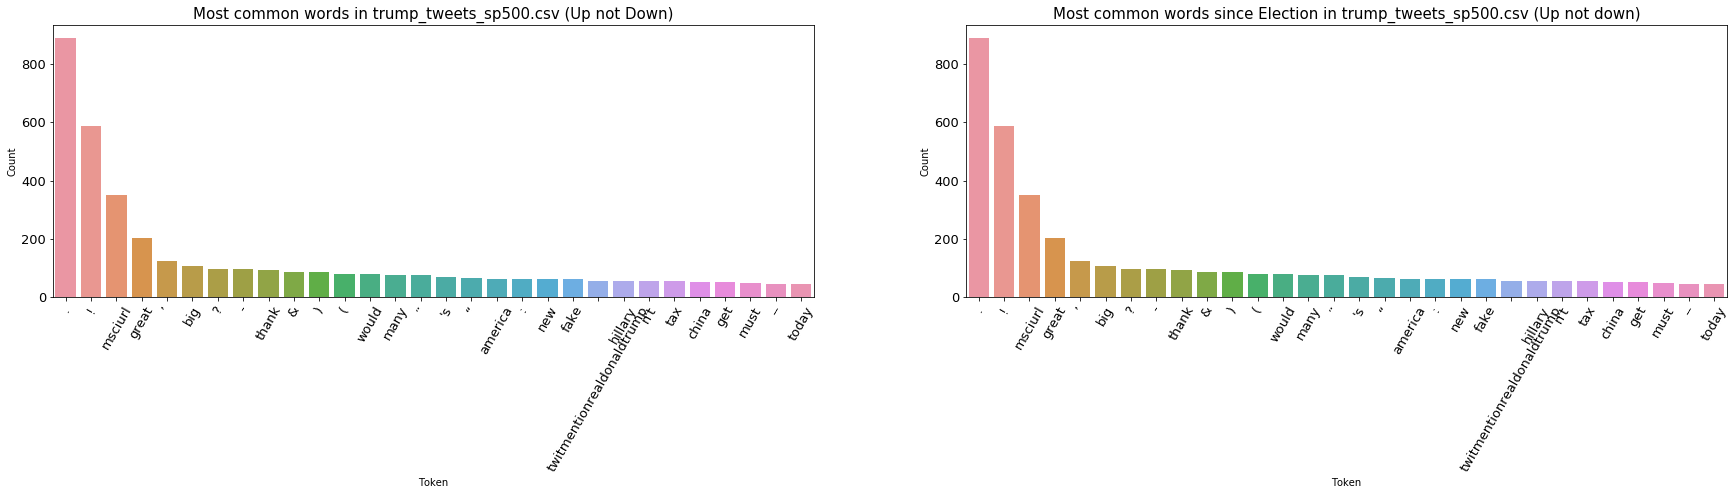

In [13]:
fig, ax = get_fig_ax(1, 2, 15, 5)
ax = top_n_tokens_plot_from_counter(up_not_down, 30, ax, 0, 0, "Most common words in {} (Up not Down)".format(file_name))
ax = top_n_tokens_plot_from_counter(up_not_down, 30, ax, 0, 1, "Most common words since Election in {} (Up not down)".format(file_name))

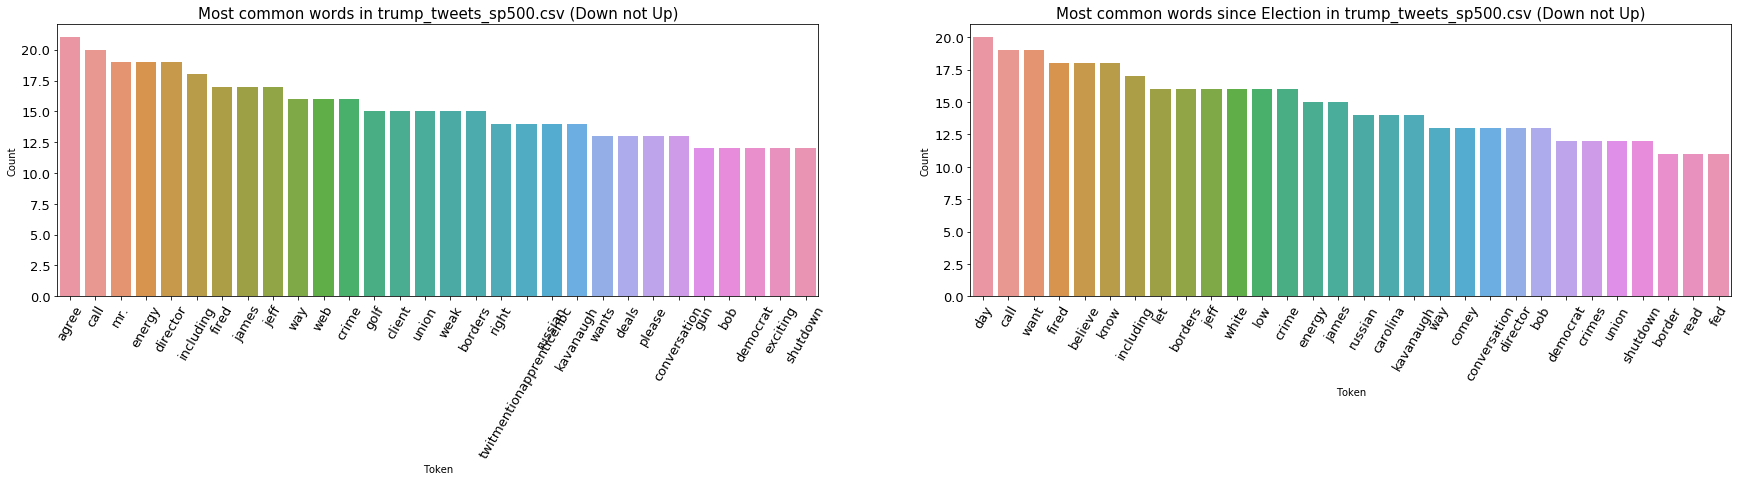

In [14]:
fig, ax = get_fig_ax(1, 2, 15, 5)
ax = top_n_tokens_plot_from_counter(down_not_up, 30, ax, 0, 0, "Most common words in {} (Down not Up)".format(file_name))
ax = top_n_tokens_plot_from_counter(down_not_up_since_election, 30, ax, 0, 1, "Most common words since Election in {} (Down not Up)".format(file_name))

# 3.0 Clustering for Common Topics

Ran out of memory trying to do this for all Trump tweets - I'm only going to do it for tweets since the election.  
Elbow method: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [15]:
# Stealing stuff... http://brandonrose.org/clustering
from nltk.stem.snowball import SnowballStemmer
import nltk, re
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
stemmer = SnowballStemmer("english")

In [17]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
#     tokens = text.split(" ")
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
#     stems = [stemmer.stem(t) for t in text.split(" ")]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [18]:
preprocessed_vocab = ' '.join(since_election['preprocessed_text'].tolist())
total_vocab = list(set(tokenize_only(preprocessed_vocab)))
total_vocab_stemmed = [stemmer.stem(t) for t in total_vocab]
vocab_frame = pd.DataFrame({'words': total_vocab}, index = total_vocab_stemmed)
print('there are ', str(vocab_frame.shape[0]), ' items in vocab_frame')

there are  9588  items in vocab_frame


In [19]:
vocab_frame.head(10)

,words
swamp,swamped
drastic,drastically
belov,beloved
twitmentiondevinnun,twitmentiondevinnunes
twitmentionabcworldnew,twitmentionabcworldnews
separ,separated
effect,effective
burnett,burnett
cancel,cancel
messag,messages


In [20]:
vocab_frame.loc[['charact']].values.tolist()

[['characters'], ['character']]

In [21]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000000000,
                                 min_df=0.01, stop_words=stop_words.union({'msciurl'}),
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(since_election["preprocessed_text"].tolist()) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

/home/michael/anaconda3/envs/testenv/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(4395, 414)


In [22]:
terms = tfidf_vectorizer.get_feature_names()

In [23]:
terms[:10]

['act',
 'actual',
 'administr',
 'agre',
 'allow',
 'almost',
 'along',
 'alreadi',
 'also',
 'alway']

dist is defined as 1 - the cosine similarity of each document. Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus (each synopsis among the synopses). Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane.

Note that with dist it is possible to evaluate the similarity of any two or more synopses.

In [24]:
# from sklearn.metrics.pairwise import cosine_similarity
# dist = 1 - cosine_similarity(tfidf_matrix)

In [25]:
from sklearn.cluster import KMeans
num_clusters=None
inertias = []
# min_inertia = float('inf')
for i in range(2, 100, 10):
    km = KMeans(n_clusters=i, max_iter=10000, n_jobs=6)
    km.fit(tfidf_matrix)
#     if km.inertia_ < min_inertia:
#     num_clusters = i
    inertias.append(km.inertia_)


In [26]:
# len(inertias)

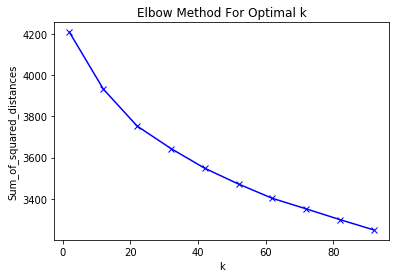

In [27]:
plt.plot(range(2, 100, 10), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
# Best number of clusters (elbow method): 
num_clusters = 10
km = KMeans(n_clusters=num_clusters, max_iter=10000, n_jobs=4)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [29]:
km.inertia_

3979.30541648723

In [30]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

/home/michael/anaconda3/envs/testenv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
since_election['cluster_number'] = clusters

/home/michael/anaconda3/envs/testenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
since_election.head(10)

,text,created_at,retweet_count,favorite_count,is_retweet,after_dir,1_open_dir,1_close_dir,2_open_dir,2_close_dir,...,sow_open_dir,sig_up,sig_down,is_sig,preprocessed_text,created_hour,dow,num_links,num_words,cluster_number
4457,TODAY WE MAKE AMERICA GREAT AGAIN!,2016-11-08 11:43:14,344806.0,573283,False,1,1,1,1,1,...,1,1,0,1,today we make america great again !,11,1,0,6,5
4458,VOTE TODAY! Go to https://t.co/MXrAxYnTjY to find your polling location. We are going to Make America Great Again!… https://t.co/KPQ5EY9VwQ,2016-11-08 16:39:36,29314.0,67452,False,1,1,1,1,1,...,1,1,0,1,vote today ! go to msciurl to find your polling location . we are going to make america great again ! … msciurl,16,1,1,17,5
4459,We need your vote. Go to the POLLS! Let's continue this MOVEMENT! Find your poll location: https://t.co/VMUdvi1tx1… https://t.co/zGOx74Ebhw,2016-11-08 18:03:49,23878.0,62105,False,0,1,1,1,1,...,1,0,1,1,we need your vote . go to the polls ! let 's continue this movement ! find your poll location : msciurl msciurl,18,1,1,17,2
4460,I will be watching the election results from Trump Tower in Manhattan with my family and friends. Very exciting!,2016-11-08 21:18:04,24669.0,125385,False,0,1,1,1,1,...,1,0,1,1,i will be watching the election results from trump tower in manhattan with my family and friends . very exciting !,21,1,0,18,3
4461,"Just out according to @CNN: ""Utah officials report voting machine problems across entire country""",2016-11-08 21:28:24,21504.0,47353,False,0,1,1,1,1,...,1,0,1,1,just out according to twitmentioncnn : `` utah officials report voting machine problems across entire country '',21,1,0,15,9
4462,Don't let up keep getting out to vote - this election is FAR FROM OVER! We are doing well but there is much time left. GO FLORIDA!,2016-11-08 21:31:20,35805.0,116929,False,0,1,1,1,1,...,1,0,1,1,do n't let up keep getting out to vote - this election is far from over ! we are doing well but there is much time left . go florida !,21,1,0,27,2
4463,Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before,2016-11-09 11:36:58,220796.0,633253,False,1,1,1,1,1,...,1,1,0,1,such a beautiful and important evening ! the forgotten man and woman will never be forgotten again . we will all come together as never before,11,2,0,23,2
4464,If the election were based on total popular vote I would have campaigned in N.Y. Florida and California and won even bigger and more easily,2016-11-15 13:34:43,49623.0,179219,False,1,1,1,1,1,...,1,1,0,1,if the election were based on total popular vote i would have campaigned in n.y. florida and california and won even bigger and more easily,13,1,0,24,2
4465,The Electoral College is actually genius in that it brings all states including the smaller ones into play. Campaigning is much different!,2016-11-15 13:40:29,39125.0,128083,False,1,1,1,1,1,...,1,1,0,1,the electoral college is actually genius in that it brings all states including the smaller ones into play . campaigning is much different !,13,1,0,22,2
4466,My transition team which is working long hours and doing a fantastic job will be seeing many great candidates today. #MAGA,2016-11-17 12:46:23,21195.0,96513,False,1,1,1,1,1,...,1,1,0,1,my transition team which is working long hours and doing a fantastic job will be seeing many great candidates today . twithashtagmaga,12,3,0,19,5


In [33]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words: " % i, end='')
    words_in_cluster = []
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
#         print(' %s' % list(itertools.chain(*vocab_frame.loc[terms[ind].split(' ')].values.tolist())), end=',')
        words_in_cluster.extend(list(itertools.chain(*vocab_frame.loc[terms[ind].split(' ')].values.tolist())))
    print(' '.join(set(words_in_cluster)))

Cluster 0 words: look seeing great meeting greats greatness looked looking looks greatly meet meets sees forward meetings see
Cluster 1 words: fakes news fake media
Cluster 2 words: times country years year democrat yearly time timed democrats countries democratic people very peoples
Cluster 3 words: presided presides 'president presidents thanked trumps trump thank president presidency 'trump obama donald thanks thankful
Cluster 4 words: secured security crime securing democrat secure democrats walls wall democratic borders border crimes secures
Cluster 5 words: jobs honor honored honorable honors americas honoring greats greatness america job today thank greatly thankful thanked thanks great
Cluster 6 words: unite presided 'president presides states united peoples uniting presidents president presidency very people units stated state unit
Cluster 7 words: china tariffs billion dollar trading dollars billions tariff trade
Cluster 8 words: witch crooked hillary hunt
Cluster 9 words: in

## 3.1 Class Distribution of Clusters

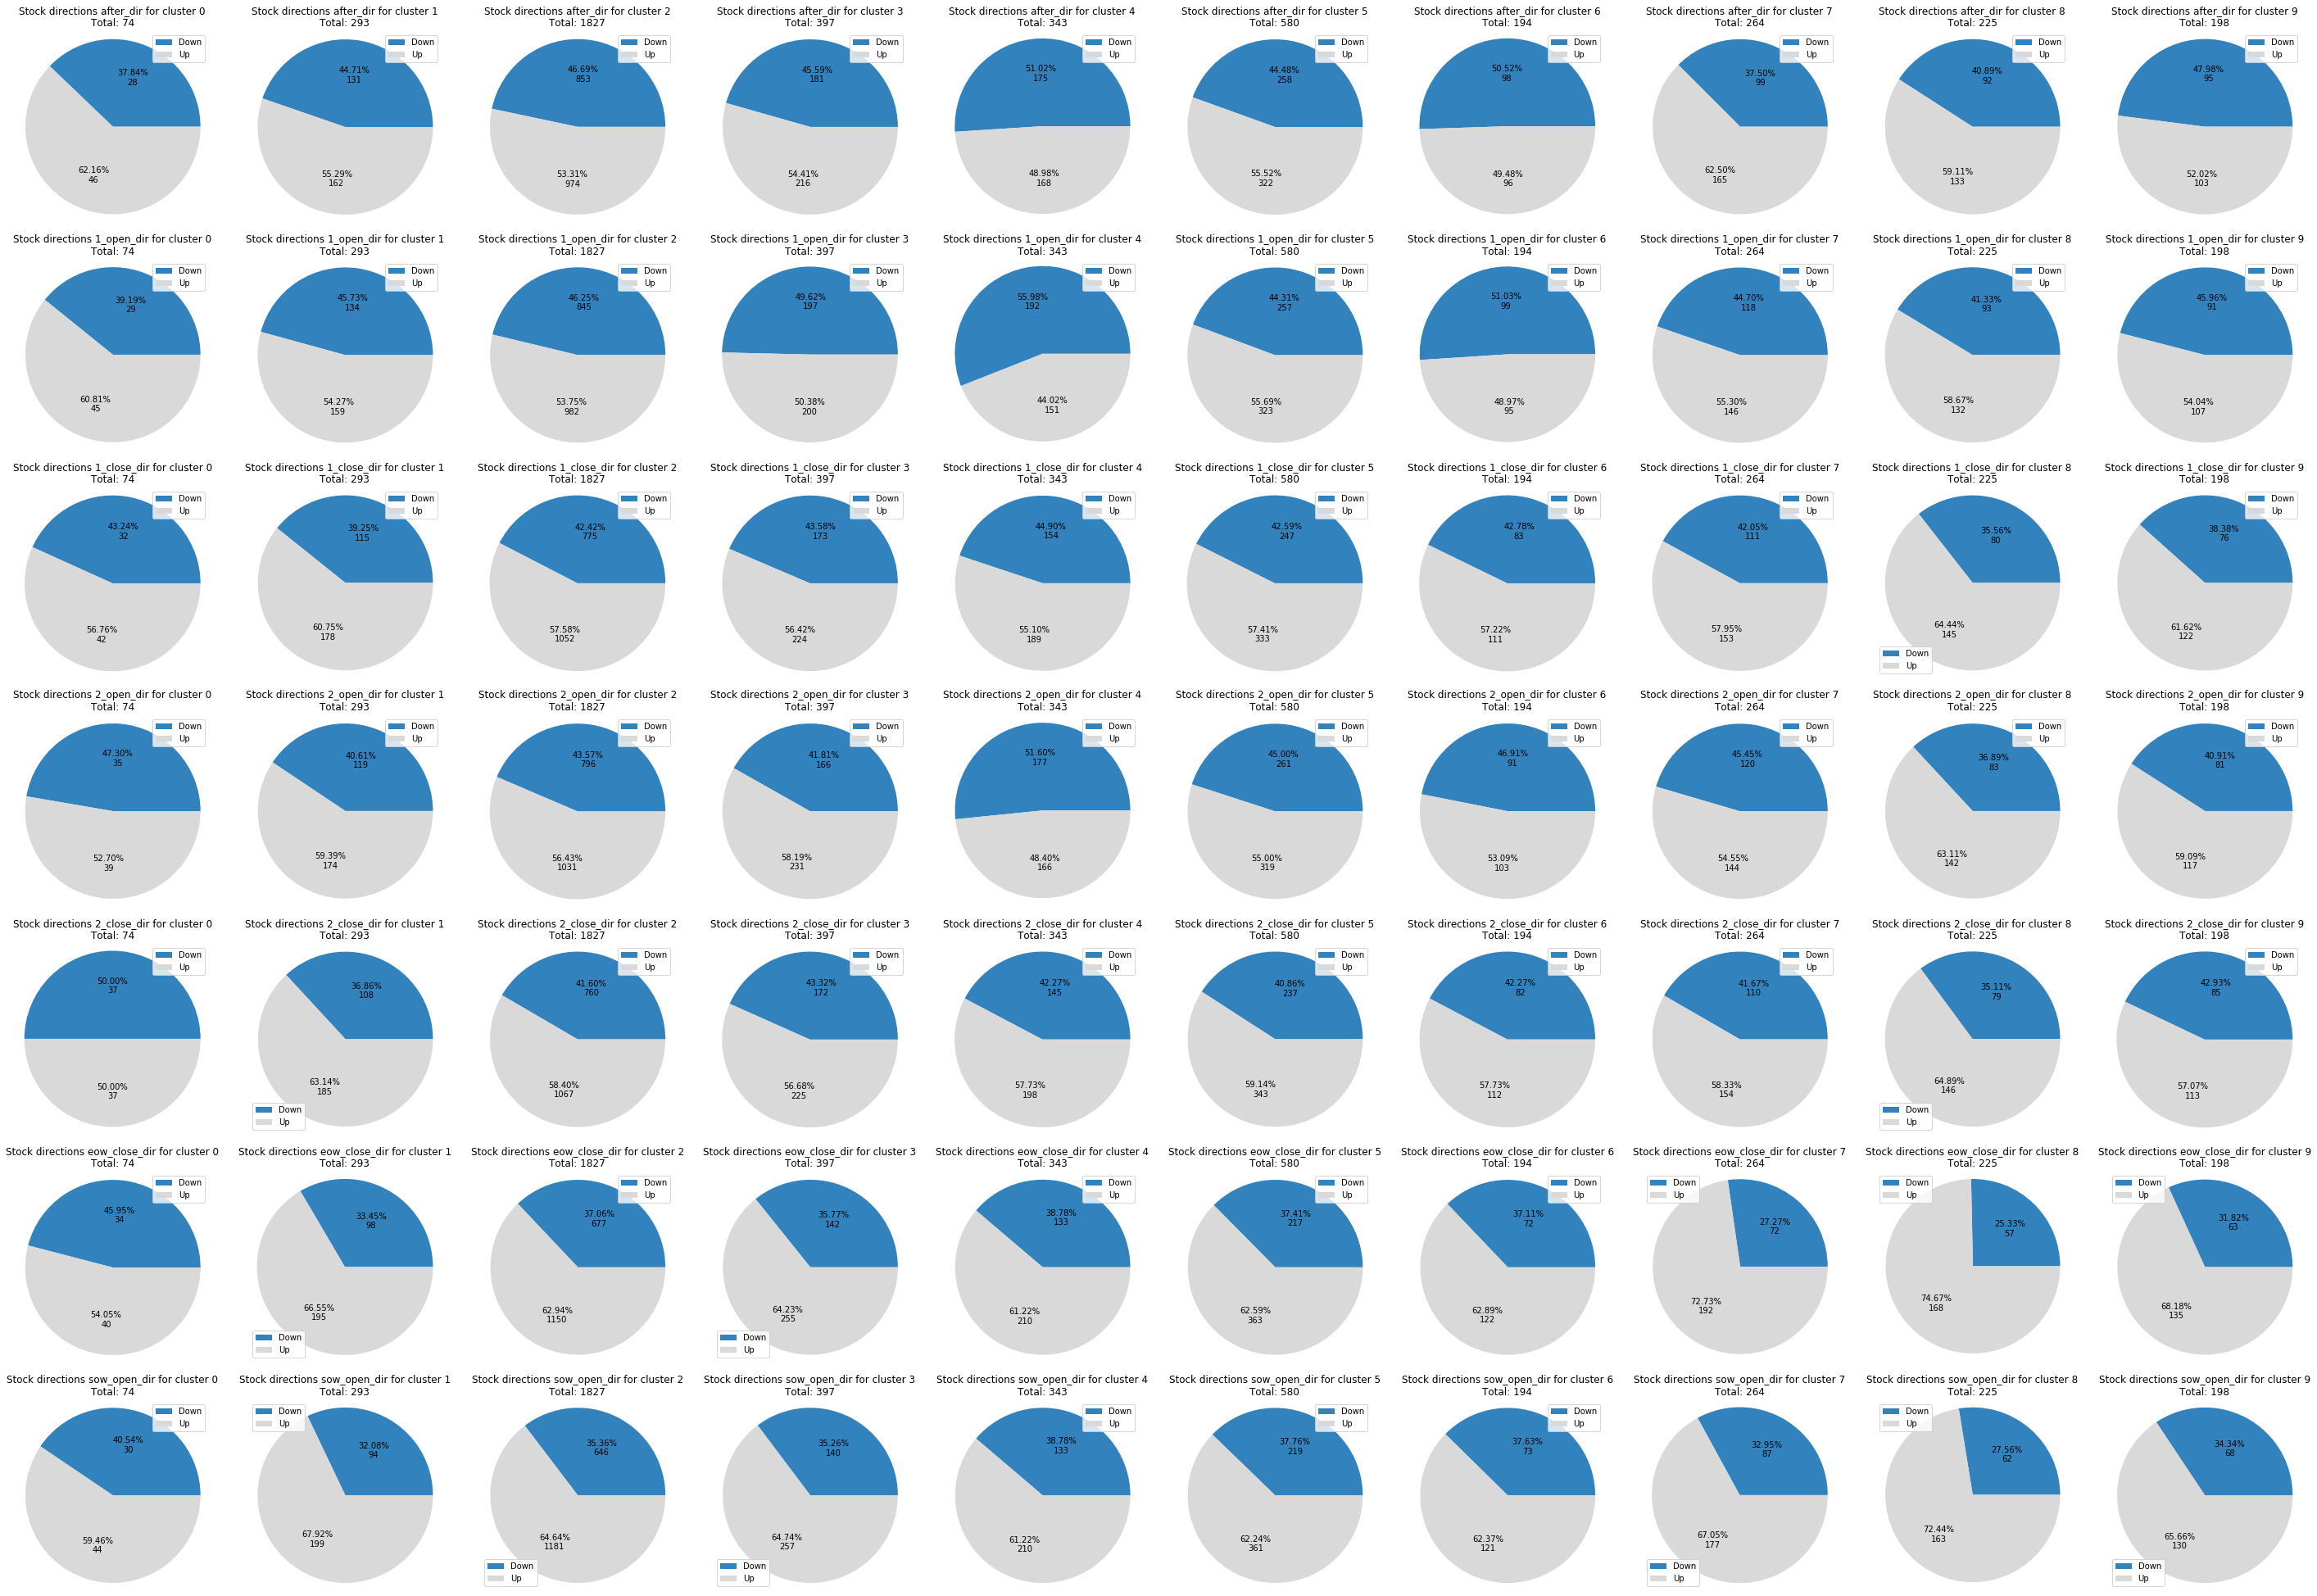

In [34]:
fig, ax = get_fig_ax(7, num_clusters, 5, 5)
for i in range(num_clusters):
    curr_cluster = since_election[since_election['cluster_number'] == i]
    ax = visualize_class_distribution(curr_cluster["after_dir"], given_title="Stock directions after_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=0, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["1_open_dir"], given_title="Stock directions 1_open_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=1, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["1_close_dir"], given_title="Stock directions 1_close_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=2, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["2_open_dir"], given_title="Stock directions 2_open_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=3, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["2_close_dir"], given_title="Stock directions 2_close_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=4, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["eow_close_dir"], given_title="Stock directions eow_close_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=5, col_idx=i)
    ax = visualize_class_distribution(curr_cluster["sow_open_dir"], given_title="Stock directions sow_open_dir for cluster {}".format(i), given_label_titles={1: "Up", 0:"Down"}, axes=ax, row_idx=6, col_idx=i)

## 3.2 Examples in Clusters

In [35]:
df = None
sample_size=5
for i in range(num_clusters):
    curr_cluster = since_election[since_election['cluster_number'] == i]
    if df is None:
        df = curr_cluster.sample(n=min(sample_size, len(curr_cluster.index)-1))
    else:
        df = df.append(curr_cluster.sample(n=min(sample_size, len(curr_cluster.index)-1)))
    df = df.append(pd.Series(), ignore_index=True)
df[["text", "cluster_number"]]

,text,cluster_number
0,We are one step closer to delivering MASSIVE tax cuts for working families across America. Special thanks to @SenateMajLdr Mitch McConnell and Chairman @SenOrrinHatch for shepherding our bill through the Senate. Look forward to signing a final bill before Christmas! https://t.co/gmWTny3SfS,0.0
1,WOW - Mesa Arizona! Look forward to joining everyone soon. Something’s happening!! #MAGA🇺🇸 https://t.co/z6LNGYoICO,0.0
2,Received message last night from XI JINPING of China that his meeting with KIM JONG UN went very well and that KIM looks forward to his meeting with me. In the meantime and unfortunately maximum sanctions and pressure must be maintained at all cost!,0.0
3,....also a small apology for testing the short range missiles and that this testing would stop when the exercises end. I look forward to seeing Kim Jong Un in the not too distant future! A nuclear free North Korea will lead to one of the most successful countries in the world!,0.0
4,Looking forward to being with great leaders in France! Leaving soon. https://t.co/hUd66sKFU2,0.0
5,NaN,NaN
6,Thank you to Brit. This is a very big deal in Europe. Fake News is the Enemy of the People! https://t.co/WX0o8gaiMC,1.0
7,I am very excited about the person who will be taking the place of Don McGahn as White House Councel! I liked Don but he was NOT responsible for me not firing Bob Mueller or Jeff Sessions. So much Fake Reporting and Fake News!,1.0
8,The Fake News Media has been talking about recent approval ratings of me by countries around the world including the European Union as being very low....,1.0
9,In the “old days” when good news was reported the Stock Market would go up. Today when good news is reported the Stock Market goes down. Big mistake and we have so much good (great) news about the economy!,1.0


## 3.3 LDA for Topic Clustering - SKIPPING FOR NOW, SINCE IT'S NOT TECHNICALLY PART OF THE REPORT

This section focuses on using Latent Dirichlet Allocation (LDA) to learn yet more about the hidden structure within the top 100 film synopses. LDA is a probabilistic topic model that assumes documents are a mixture of topics and that each word in the document is attributable to the document's topics. There is quite a good high-level overview of probabilistic topic models by one of the big names in the field, David Blei, available in the Communications of the ACM here. Incidentally, Blei was one of the authors of the seminal paper on LDA.
https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

# 4.0 Distributions

## 4.1.1 Time of Day (Up vs Down)

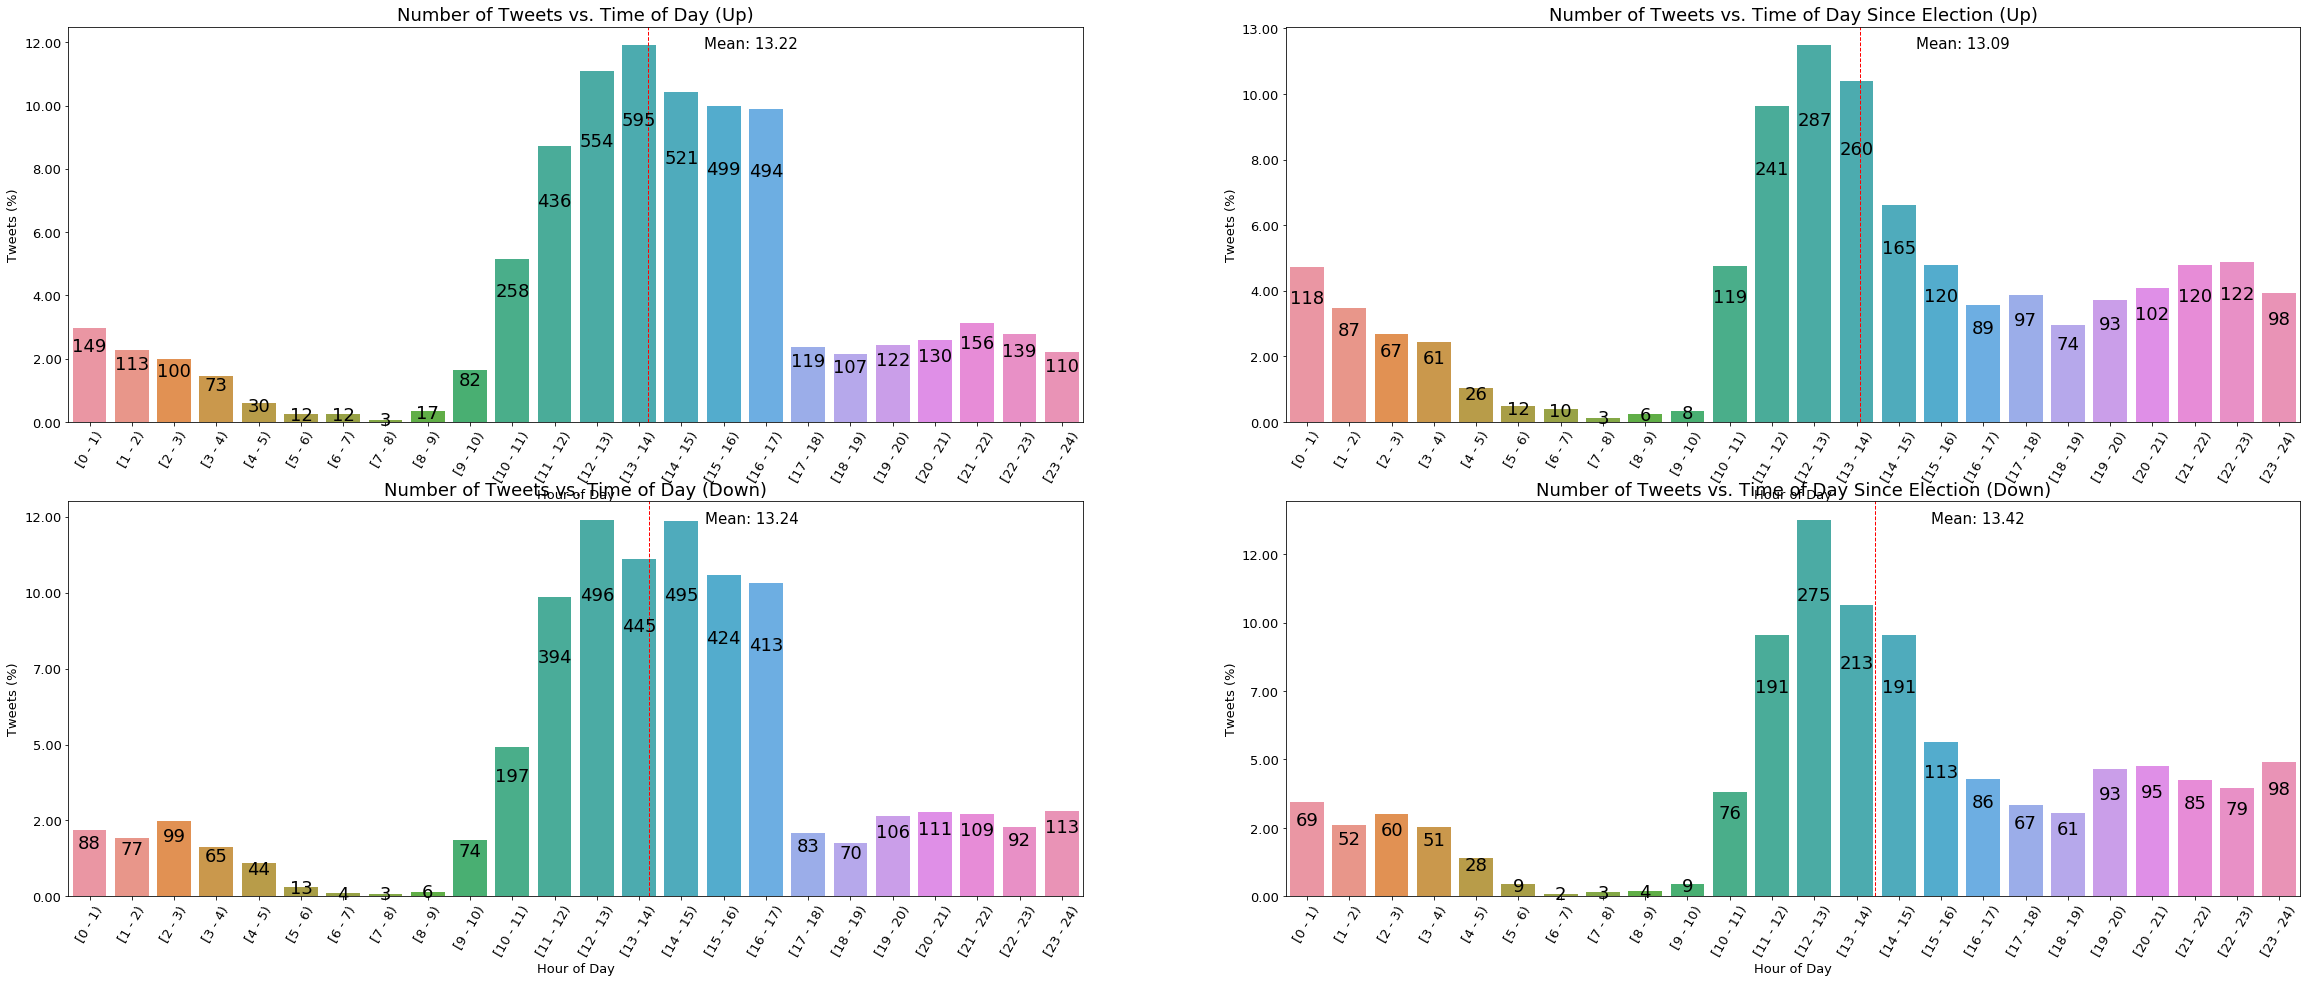

In [36]:
from data_science_toolkit.data_visualization import generate_histogram
fig, ax = get_fig_ax(2, 2, 20, 8)
ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 1]["created_hour"], ax, 0, 0, "Hour of Day", "Tweets (%)", "Number of Tweets vs. Time of Day (Up)", True, show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 1]["created_hour"], ax, 0, 1, "Hour of Day", "Tweets (%)", "Number of Tweets vs. Time of Day Since Election (Up)", True, show_sd=False, show_best_fit=False)
ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 0]["created_hour"], ax, 1, 0, "Hour of Day", "Tweets (%)", "Number of Tweets vs. Time of Day (Down)", True, show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 0]["created_hour"], ax, 1, 1, "Hour of Day", "Tweets (%)", "Number of Tweets vs. Time of Day Since Election (Down)", True, show_sd=False, show_best_fit=False)

## 4.2.1 Day of Week (Up vs Down)

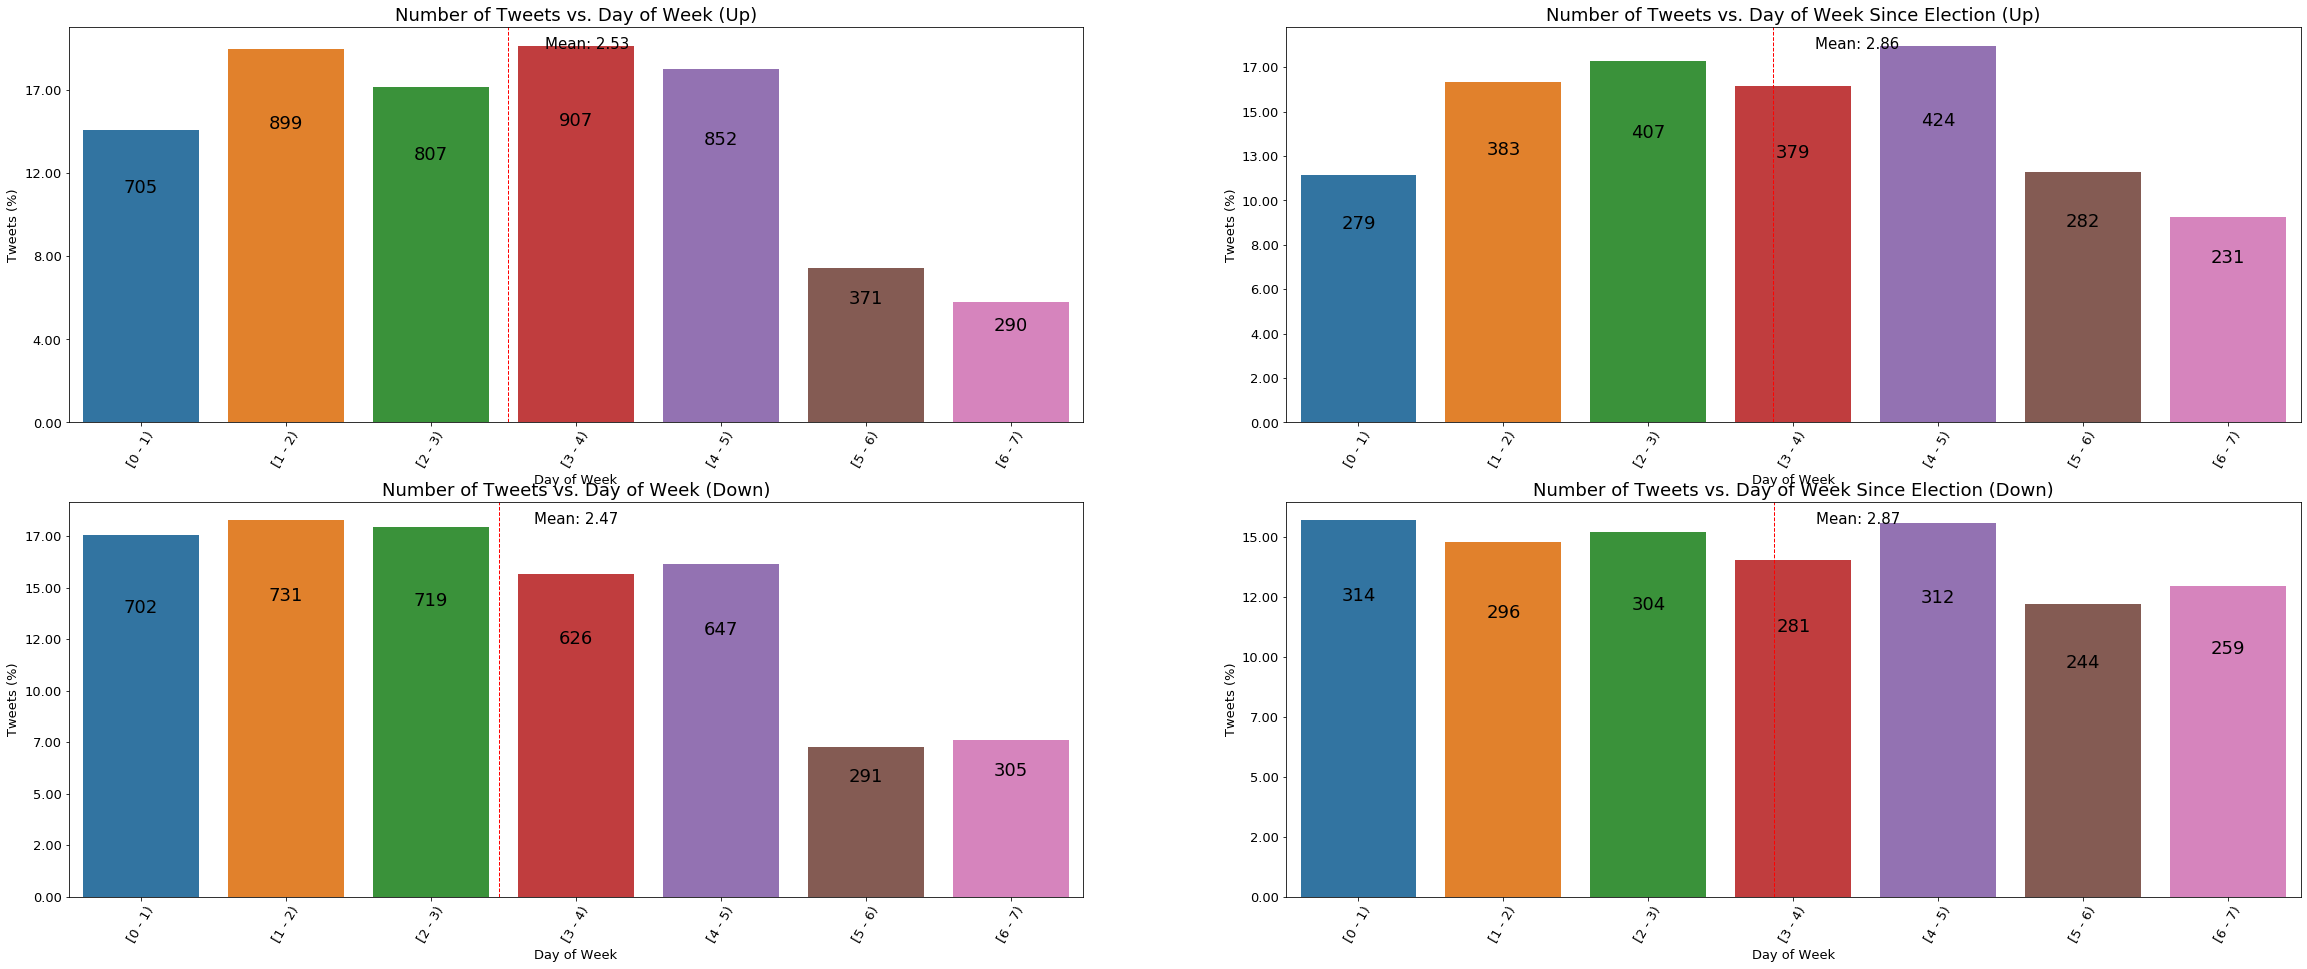

In [37]:
fig, ax = get_fig_ax(2, 2, 20, 8)
ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 1]["dow"], ax, 0, 0, "Day of Week", "Tweets (%)", "Number of Tweets vs. Day of Week (Up)", True, show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 1]["dow"], ax, 0, 1, "Day of Week", "Tweets (%)", "Number of Tweets vs. Day of Week Since Election (Up)", True, show_sd=False, show_best_fit=False)
ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 0]["dow"], ax, 1, 0, "Day of Week", "Tweets (%)", "Number of Tweets vs. Day of Week (Down)", True, show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 0]["dow"], ax, 1, 1, "Day of Week", "Tweets (%)", "Number of Tweets vs. Day of Week Since Election (Down)", True, show_sd=False, show_best_fit=False)

## 4.3.1 Num Retweets (Up vs Down)

In [38]:
def cdf(x, plot=True, *args, **kwargs):
    x, y = sorted(x), np.arange(len(x)) / len(x)
    return plt.plot(x, y, *args, **kwargs) if plot else (x, y)

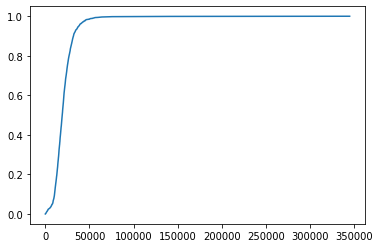

In [39]:
ax = cdf(since_election[(since_election["after_dir"] == 1)]["retweet_count"].tolist())

In [40]:
bin_list = [[0, 500], [500, 1000]] + [[x, x+1000] for x in range(1000, 50000, 1000)] + [[50000, 100000], [100000, float("inf")]]

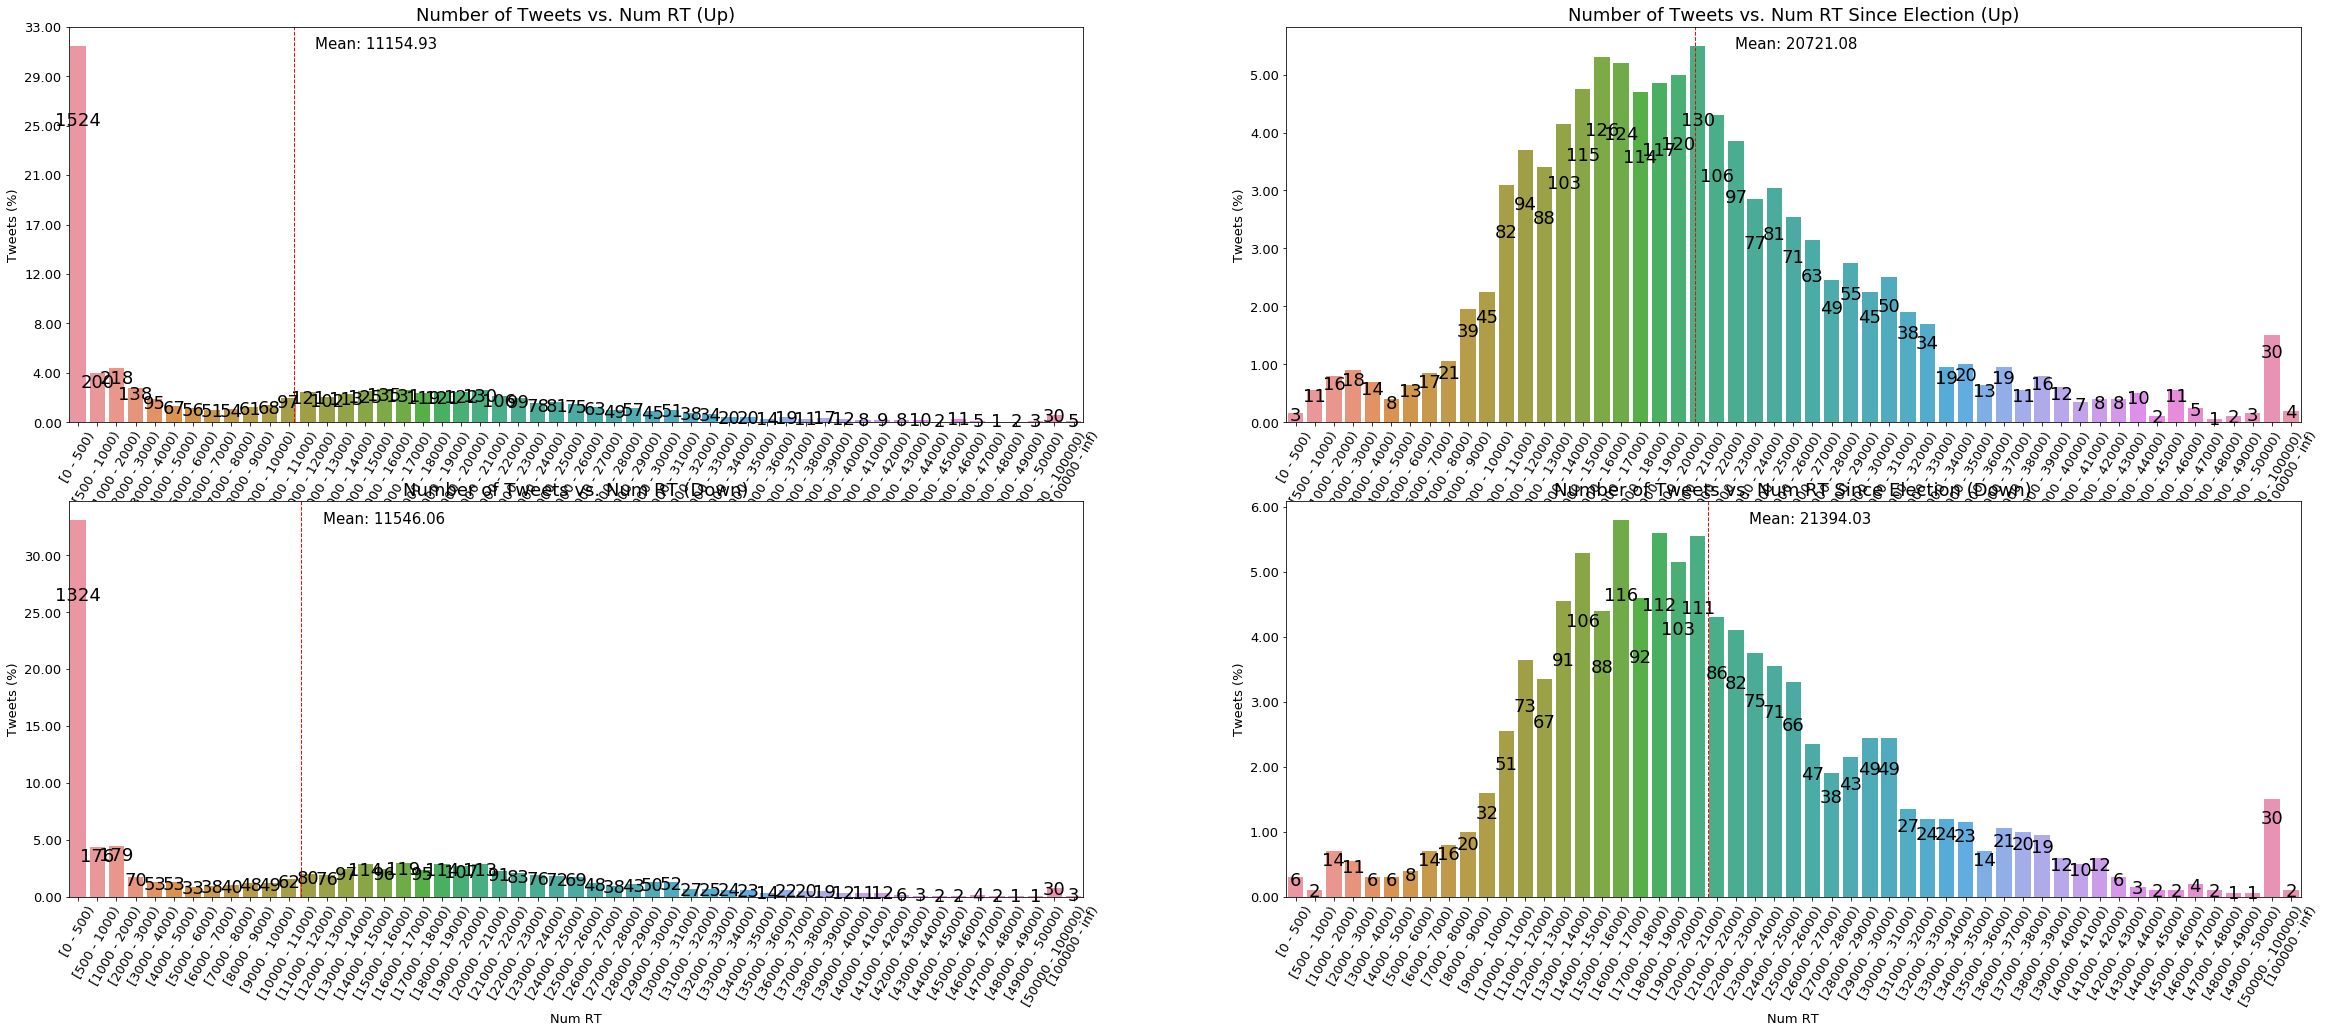

In [41]:
fig, ax = get_fig_ax(2, 2, 20, 8)

ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 1]["retweet_count"], ax, 0, 0, 
                        "Num Retweets", "Tweets (%)", "Number of Tweets vs. Num RT (Up)", True, 
                        bins=bin_list, show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 1]["retweet_count"], ax, 0, 1, 
                        "Num Retweets", "Tweets (%)", "Number of Tweets vs. Num RT Since Election (Up)", True, 
                        bins=bin_list, show_sd=False, show_best_fit=False)
ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 0]["retweet_count"], ax, 1, 0, 
                        "Num RT", "Tweets (%)", "Number of Tweets vs. Num RT (Down)", True, 
                        bins=bin_list, show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 0]["retweet_count"], ax, 1, 1, 
                        "Num RT", "Tweets (%)", "Number of Tweets vs. Num RT Since Election (Down)", True, 
                        bins=bin_list, show_sd=False, show_best_fit=False)

## 4.4.1 Num Favorites (Up vs Down)

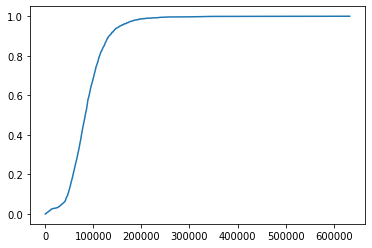

In [42]:
ax = cdf(since_election[(since_election["after_dir"] == 1) & (since_election['is_retweet'] == False)]["favorite_count"].tolist())

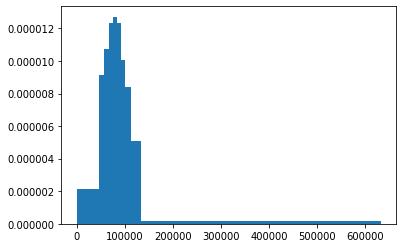

In [43]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

x = since_election[(since_election["after_dir"] == 1) & (since_election['is_retweet'] == False)]["favorite_count"].tolist()
n, bins, patches = plt.hist(x, histedges_equalN(x, 10), density=True)

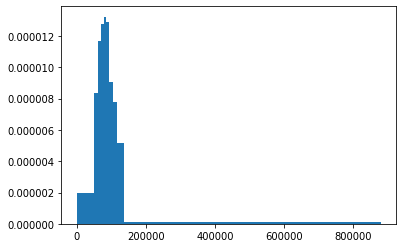

In [44]:
x = since_election[(since_election["after_dir"] == 0) & (since_election['is_retweet'] == False)]["favorite_count"].tolist()
n, bins, patches = plt.hist(x, histedges_equalN(x, 10), density=True)

In [45]:
bin_list = [[0, 100], [100, 10000]] + [[x, x+10000] for x in range(1000, 200000, 10000)] + [[200000, 400000], [400000, float("inf")]]

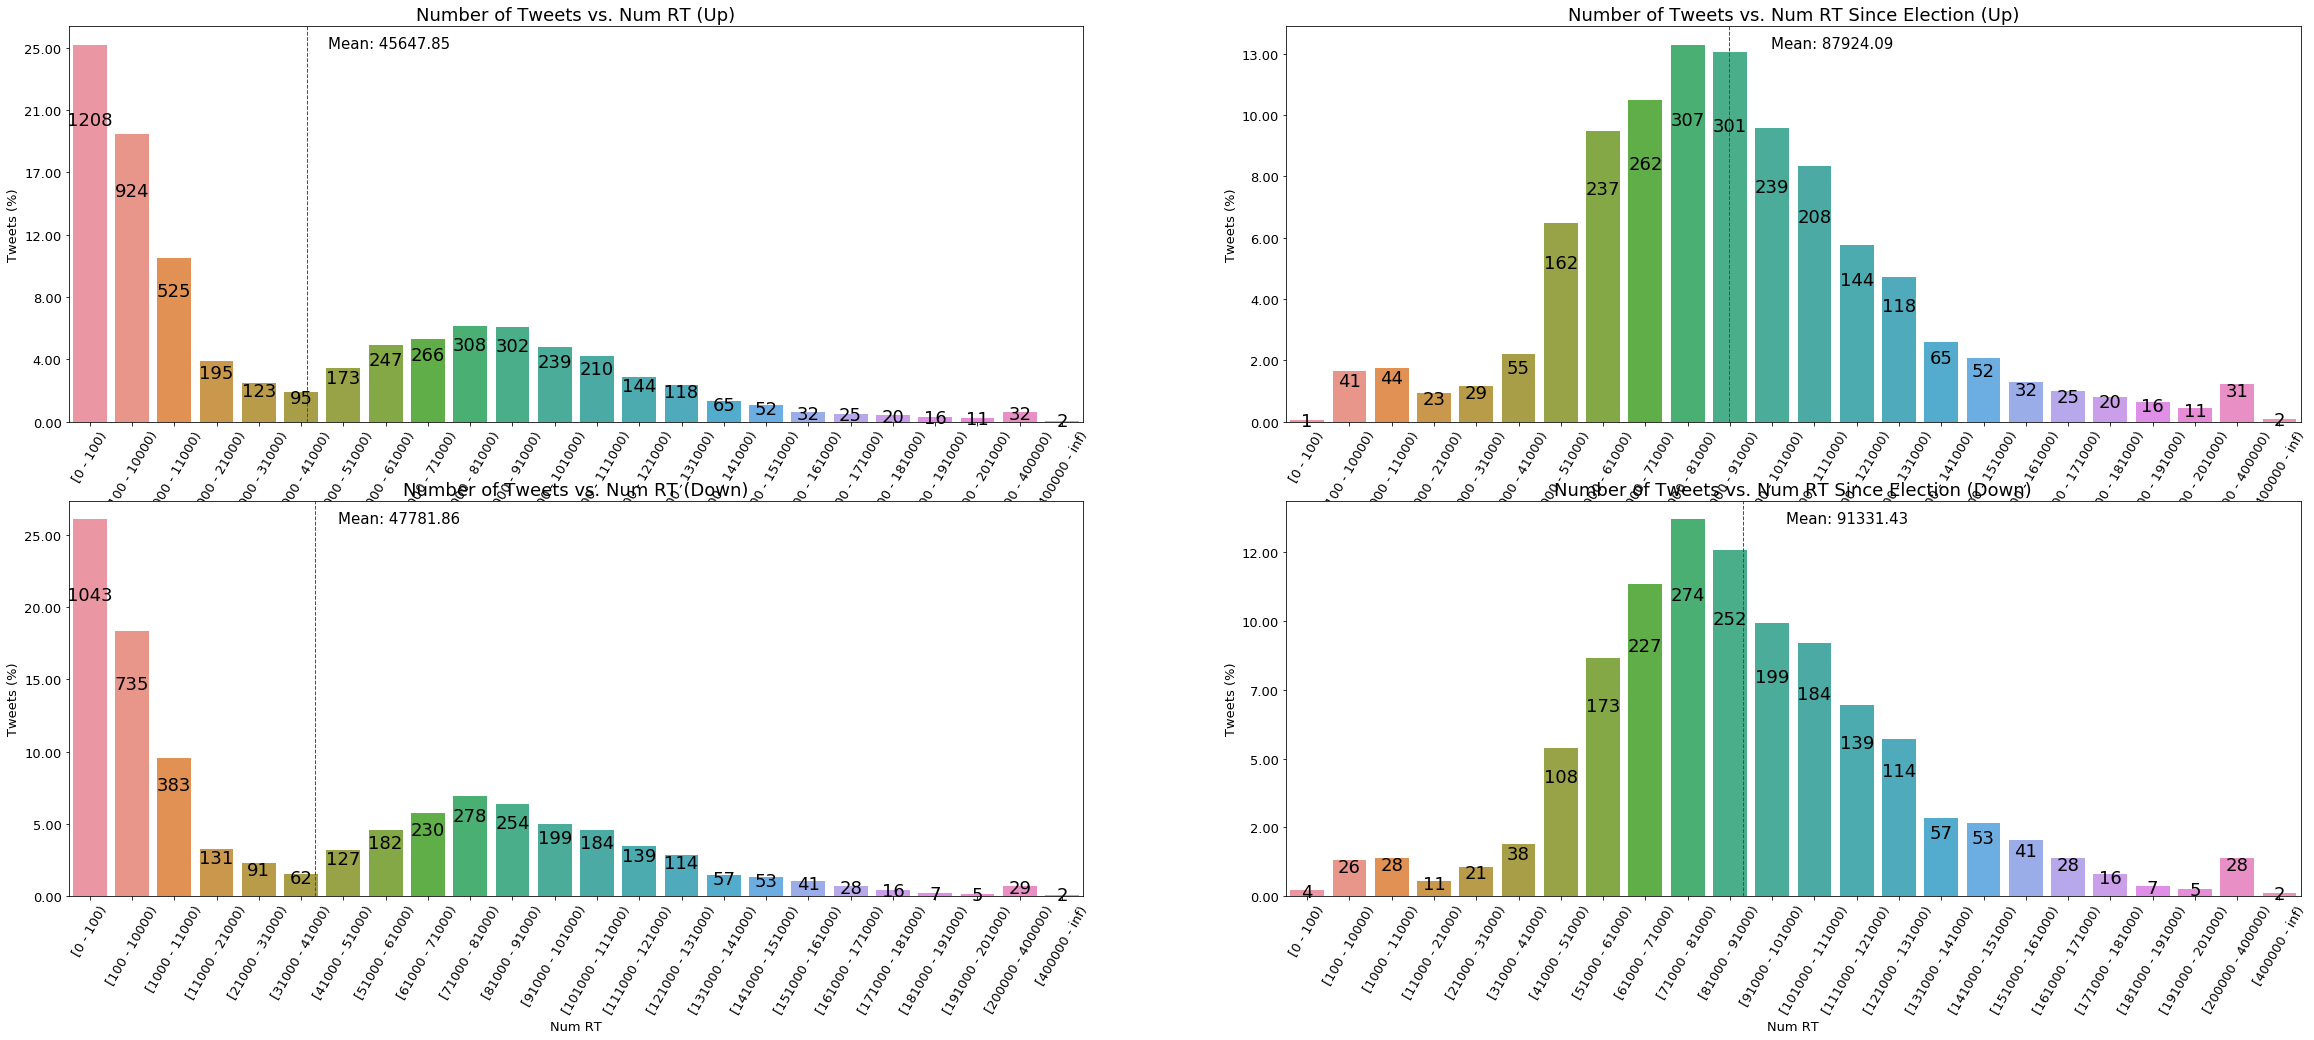

In [46]:
fig, ax = get_fig_ax(2, 2, 20, 8)

ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 1]["favorite_count"], ax, 0, 0, 
                        "Num Retweets", "Tweets (%)", "Number of Tweets vs. Num RT (Up)", True, 
                        bins=bin_list, show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 1]["favorite_count"], ax, 0, 1, 
                        "Num Retweets", "Tweets (%)", "Number of Tweets vs. Num RT Since Election (Up)", True, 
                        bins=bin_list, show_sd=False, show_best_fit=False)
ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 0]["favorite_count"], ax, 1, 0, 
                        "Num RT", "Tweets (%)", "Number of Tweets vs. Num RT (Down)", True, 
                        bins=bin_list, show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 0]["favorite_count"], ax, 1, 1, 
                        "Num RT", "Tweets (%)", "Number of Tweets vs. Num RT Since Election (Down)", True, 
                        bins=bin_list, show_sd=False, show_best_fit=False)

## 5.1 Tweet Anatomy

In [47]:
# ax = cdf(since_election[(since_election["after_dir"] == 1) & (since_election['is_retweet'] == False)]["favorite_count"].tolist())

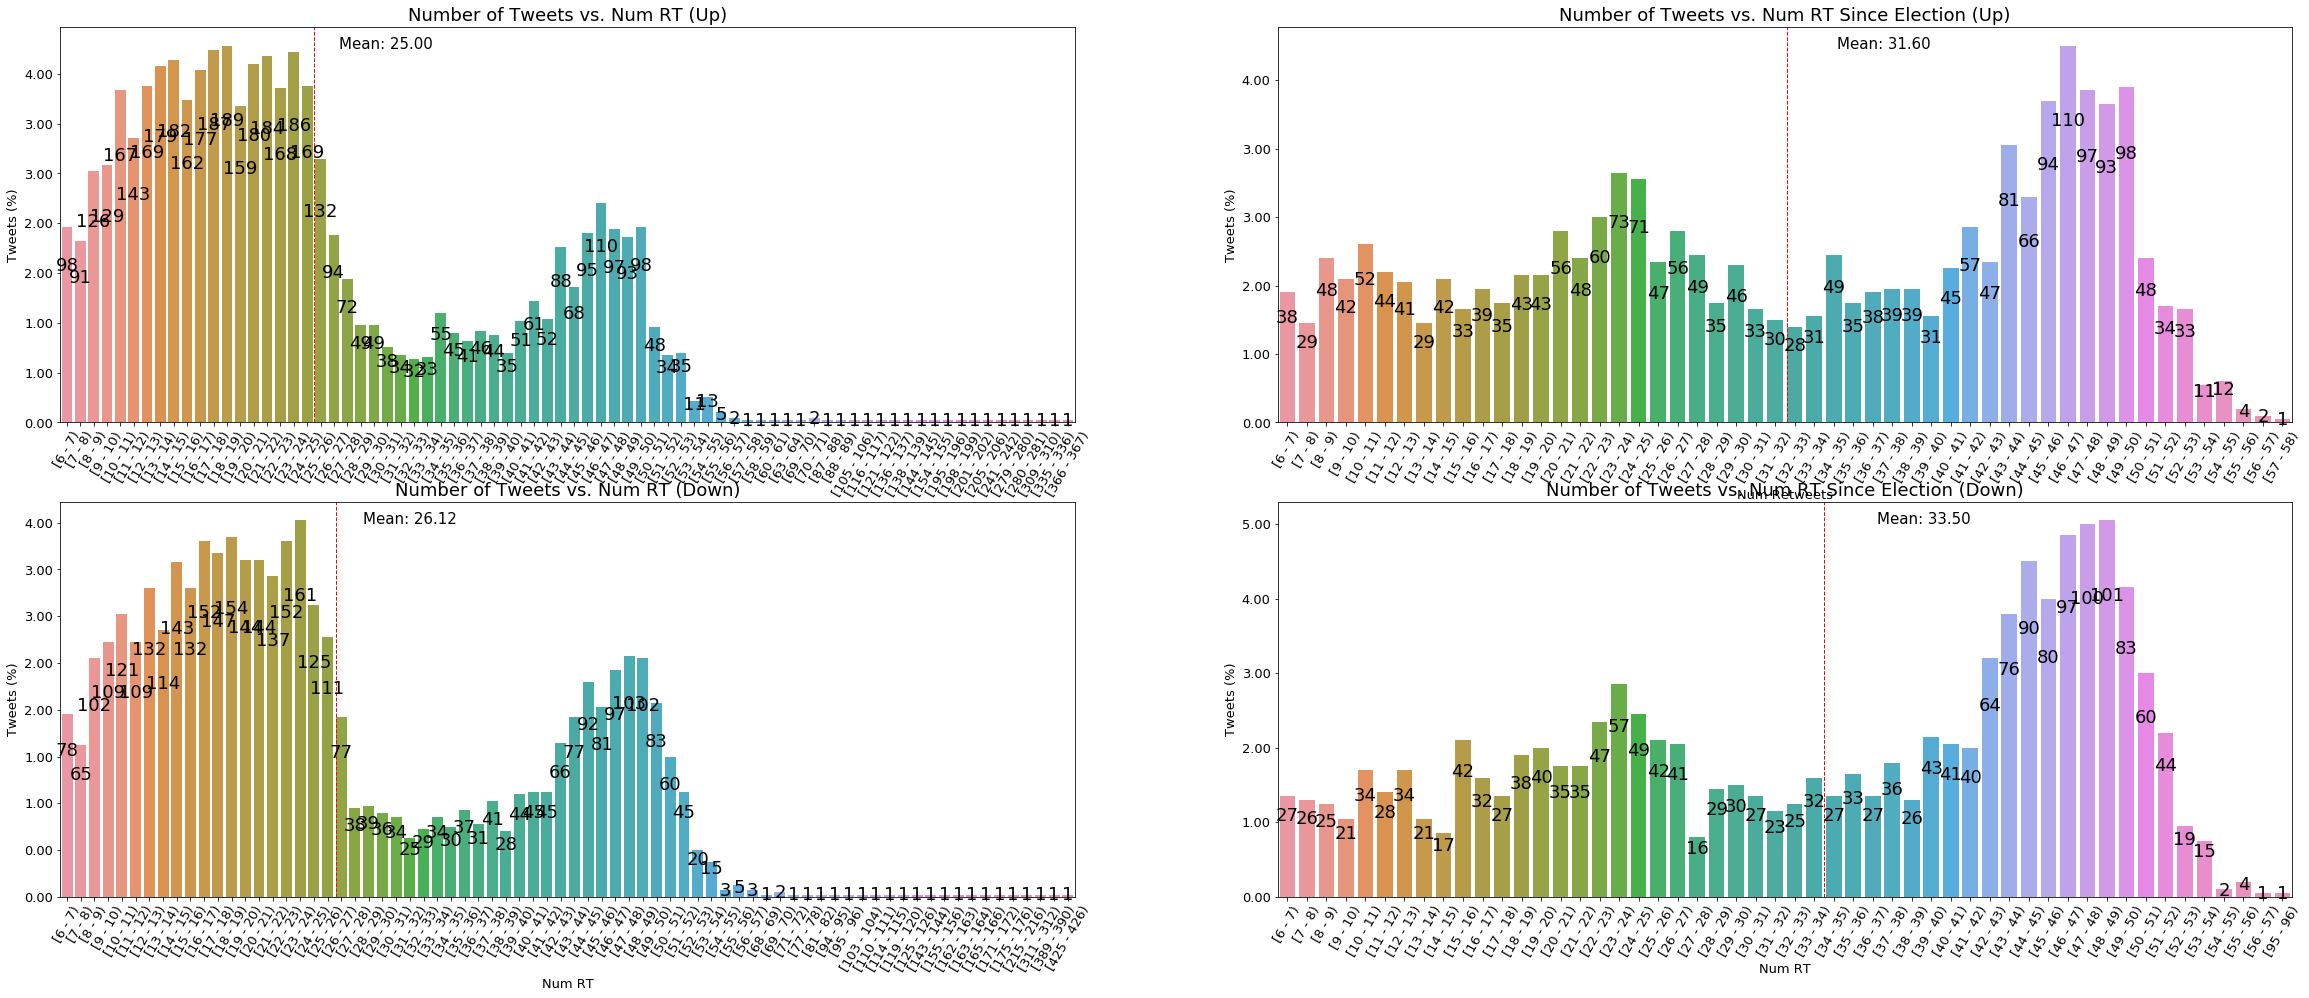

In [48]:
fig, ax = get_fig_ax(2, 2, 20, 8)

ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 1]["num_words"], ax, 0, 0, 
                        "Num Retweets", "Tweets (%)", "Number of Tweets vs. Num RT (Up)", True, 
                        show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 1]["num_words"], ax, 0, 1, 
                        "Num Retweets", "Tweets (%)", "Number of Tweets vs. Num RT Since Election (Up)", True, 
                        show_sd=False, show_best_fit=False)
ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 0]["num_words"], ax, 1, 0, 
                        "Num RT", "Tweets (%)", "Number of Tweets vs. Num RT (Down)", True, 
                        show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 0]["num_words"], ax, 1, 1, 
                        "Num RT", "Tweets (%)", "Number of Tweets vs. Num RT Since Election (Down)", True, 
                        show_sd=False, show_best_fit=False)

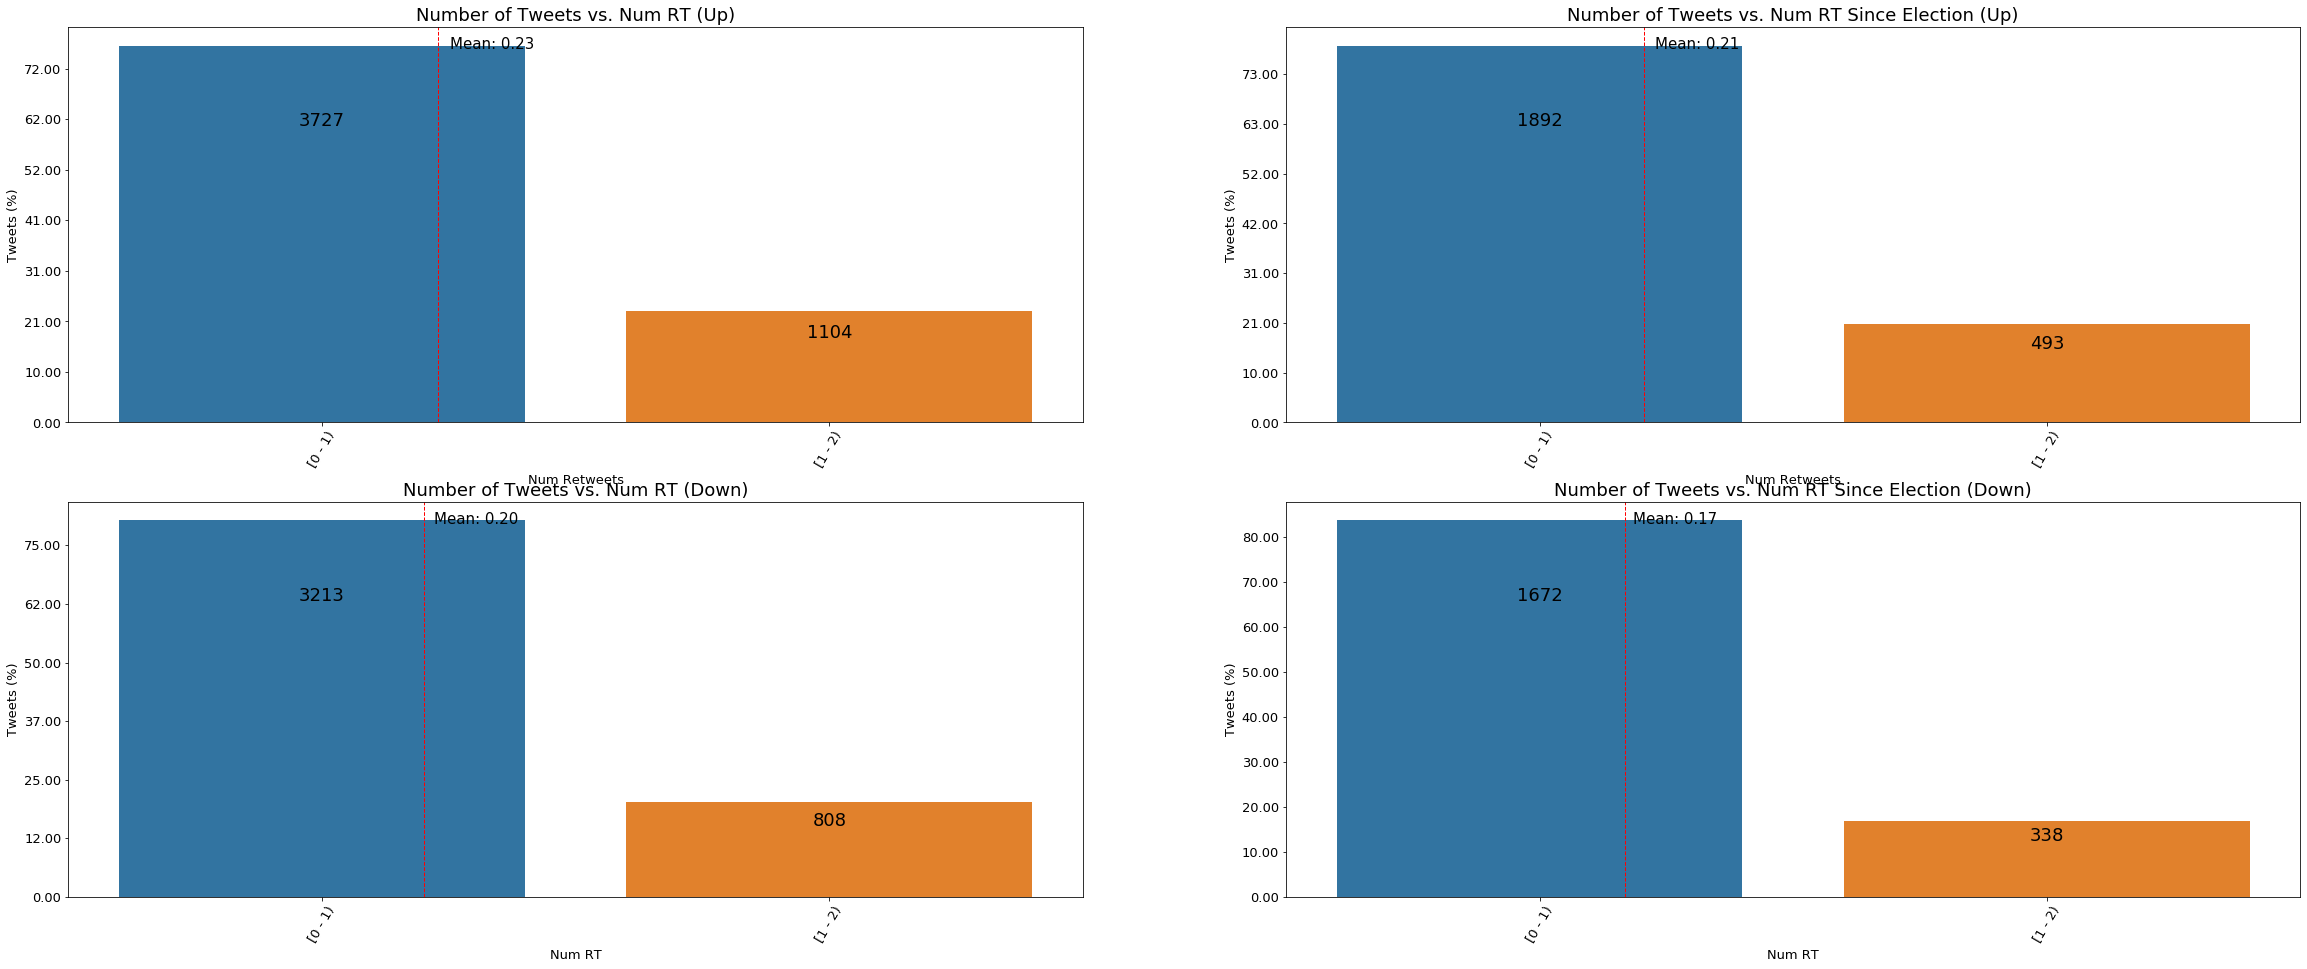

In [49]:
fig, ax = get_fig_ax(2, 2, 20, 8)

ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 1]["num_links"], ax, 0, 0, 
                        "Num Retweets", "Tweets (%)", "Number of Tweets vs. Num RT (Up)", True, 
                        show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 1]["num_links"], ax, 0, 1, 
                        "Num Retweets", "Tweets (%)", "Number of Tweets vs. Num RT Since Election (Up)", True, 
                        show_sd=False, show_best_fit=False)
ax = generate_histogram(stock_tweet[stock_tweet["after_dir"] == 0]["num_links"], ax, 1, 0, 
                        "Num RT", "Tweets (%)", "Number of Tweets vs. Num RT (Down)", True, 
                        show_sd=False, show_best_fit=False)
ax = generate_histogram(since_election[since_election["after_dir"] == 0]["num_links"], ax, 1, 1, 
                        "Num RT", "Tweets (%)", "Number of Tweets vs. Num RT Since Election (Down)", True, 
                        show_sd=False, show_best_fit=False)

In [50]:
stock_tweet.head(10)

,text,created_at,retweet_count,favorite_count,is_retweet,after_dir,1_open_dir,1_close_dir,2_open_dir,2_close_dir,eow_close_dir,sow_open_dir,sig_up,sig_down,is_sig,preprocessed_text,created_hour,dow,num_links,num_words
0,Trump Tycoon App for iPhone & iPod Touch - It's $2.99 but the advice is priceless! http://bit.ly/UGUF0,2010-01-15 16:28:02,23.0,20,False,0,0,1,1,0,0,0,0,1,1,trump tycoon app for iphone & ipod touch - it 's $ 2.99 but the advice is priceless ! msciurl,16,4,1,15
1,"from Donald Trump: ""I saw Lady Gaga last night and she was fantastic!""",2010-01-21 16:58:43,3813.0,3223,False,0,0,0,0,0,0,0,0,1,1,from donald trump : `` i saw lady gaga last night and she was fantastic ! '',16,3,0,14
2,From Donald Trump: Andrea Bocelli @ Mar-a-Lago - Many say best night of entertainment in long history of Palm Beach http://bit.ly/2fNgOz,2010-03-05 14:51:32,7.0,6,False,1,1,1,1,1,1,1,1,0,1,from donald trump : andrea bocelli @ mar-a-lago - many say best night of entertainment in long history of palm beach msciurl,14,4,1,18
3,Olympic Gold Medalist Evan Lysacek just left my office. He is in town and wanted to meet me--he's a fanastic guy and a true champion.,2010-03-17 15:14:13,13.0,7,False,1,1,1,1,0,0,0,1,0,1,olympic gold medalist evan lysacek just left my office . he is in town and wanted to meet me -- he 's a fanastic guy and a true champion .,15,2,0,26
4,Last week's episode of the Celebrity Apprentice set the stage for a great new season. Tune in this Sunday on NBC for even more excitement.,2010-03-19 14:08:33,9.0,2,False,0,0,0,0,1,0,0,0,1,1,last week 's episode of the celebrity apprentice set the stage for a great new season . tune in this sunday on nbc for even more excitement .,14,4,0,25
5,The Trump Hotel Collection is currently nominated for Conde Nast Traveler Readers Choice Awards Travel & Leisure and World Travel Awards.,2010-03-23 16:26:23,13.0,5,False,1,1,1,1,0,1,1,1,0,1,the trump hotel collection is currently nominated for conde nast traveler readers choice awards travel & leisure and world travel awards .,16,1,0,20
6,This is a terrific day for downtown New York. Trump SoHo is unlike anything else. Be sure to visit this fantastic hotel soon!,2010-04-09 16:36:36,10.0,5,False,1,1,1,1,1,1,1,1,0,1,this is a terrific day for downtown new york . trump soho is unlike anything else . be sure to visit this fantastic hotel soon !,16,4,0,22
7,On Sunday Jerome Bettis 'the bus' from the Pittsburgh Steelers will play at Trump Int'l Golf Club/Palm Beach against Julius Erving 'Dr J',2010-04-16 15:55:06,8.0,3,False,0,0,0,0,0,0,0,0,1,1,on sunday jerome bettis 'the bus ' from the pittsburgh steelers will play at trump int ' l golf club/palm beach against julius erving 'dr j ',15,4,0,22
8,Melania and I will be appearing on The View tomorrow at 11 a.m. on CBS. Tune in for some great fun!,2010-04-22 14:31:53,19.0,5,False,1,1,1,1,1,1,1,1,0,1,melania and i will be appearing on the view tomorrow at 11 a.m. on cbs . tune in for some great fun !,14,3,0,20
9,To put on your calendar for May: Miss USA 2010 live from Las Vegas on May 16th 7 p.m. ET on NBC. I'll be there--tune in for a great show!,2010-04-23 15:22:08,25.0,3,False,1,1,1,1,0,1,1,1,0,1,to put on your calendar for may : miss usa 2010 live from las vegas on may 16th 7 p.m . et on nbc . i 'll be there -- tune in for a great show !,15,4,0,30


In [51]:
since_election.head(10)

,text,created_at,retweet_count,favorite_count,is_retweet,after_dir,1_open_dir,1_close_dir,2_open_dir,2_close_dir,...,sow_open_dir,sig_up,sig_down,is_sig,preprocessed_text,created_hour,dow,num_links,num_words,cluster_number
4457,TODAY WE MAKE AMERICA GREAT AGAIN!,2016-11-08 11:43:14,344806.0,573283,False,1,1,1,1,1,...,1,1,0,1,today we make america great again !,11,1,0,6,5
4458,VOTE TODAY! Go to https://t.co/MXrAxYnTjY to find your polling location. We are going to Make America Great Again!… https://t.co/KPQ5EY9VwQ,2016-11-08 16:39:36,29314.0,67452,False,1,1,1,1,1,...,1,1,0,1,vote today ! go to msciurl to find your polling location . we are going to make america great again ! … msciurl,16,1,1,17,5
4459,We need your vote. Go to the POLLS! Let's continue this MOVEMENT! Find your poll location: https://t.co/VMUdvi1tx1… https://t.co/zGOx74Ebhw,2016-11-08 18:03:49,23878.0,62105,False,0,1,1,1,1,...,1,0,1,1,we need your vote . go to the polls ! let 's continue this movement ! find your poll location : msciurl msciurl,18,1,1,17,2
4460,I will be watching the election results from Trump Tower in Manhattan with my family and friends. Very exciting!,2016-11-08 21:18:04,24669.0,125385,False,0,1,1,1,1,...,1,0,1,1,i will be watching the election results from trump tower in manhattan with my family and friends . very exciting !,21,1,0,18,3
4461,"Just out according to @CNN: ""Utah officials report voting machine problems across entire country""",2016-11-08 21:28:24,21504.0,47353,False,0,1,1,1,1,...,1,0,1,1,just out according to twitmentioncnn : `` utah officials report voting machine problems across entire country '',21,1,0,15,9
4462,Don't let up keep getting out to vote - this election is FAR FROM OVER! We are doing well but there is much time left. GO FLORIDA!,2016-11-08 21:31:20,35805.0,116929,False,0,1,1,1,1,...,1,0,1,1,do n't let up keep getting out to vote - this election is far from over ! we are doing well but there is much time left . go florida !,21,1,0,27,2
4463,Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before,2016-11-09 11:36:58,220796.0,633253,False,1,1,1,1,1,...,1,1,0,1,such a beautiful and important evening ! the forgotten man and woman will never be forgotten again . we will all come together as never before,11,2,0,23,2
4464,If the election were based on total popular vote I would have campaigned in N.Y. Florida and California and won even bigger and more easily,2016-11-15 13:34:43,49623.0,179219,False,1,1,1,1,1,...,1,1,0,1,if the election were based on total popular vote i would have campaigned in n.y. florida and california and won even bigger and more easily,13,1,0,24,2
4465,The Electoral College is actually genius in that it brings all states including the smaller ones into play. Campaigning is much different!,2016-11-15 13:40:29,39125.0,128083,False,1,1,1,1,1,...,1,1,0,1,the electoral college is actually genius in that it brings all states including the smaller ones into play . campaigning is much different !,13,1,0,22,2
4466,My transition team which is working long hours and doing a fantastic job will be seeing many great candidates today. #MAGA,2016-11-17 12:46:23,21195.0,96513,False,1,1,1,1,1,...,1,1,0,1,my transition team which is working long hours and doing a fantastic job will be seeing many great candidates today . twithashtagmaga,12,3,0,19,5


## This is what we will be using for models...

In [52]:
since_election.to_csv('./since_election_with_cluster_{}'.format(file_name), index=False)

# Conclusions